In [ ]:
## To download data from Kaggle, first installation of opendatasets is required. 

In [2]:
!pip install opendatasets


  Using cached kaggle-1.5.12-py3-none-any.whl
  Using cached python_slugify-5.0.2-py2.py3-none-any.whl (6.7 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)


## Importing datasets in a zipped file and unzipping it and transfering to diffrent location

In [3]:
import opendatasets as od

In [ ]:
#od.download("https://www.kaggle.com/c/titanic/data")

In [4]:
import zipfile

In [5]:
with zipfile.ZipFile("C:/Users/ribis/titanic/titanic.zip", "r") as zip_ext:
    zip_ext.extractall("C:/Users/ribis/Documents/Simplilearn_Data Scientist/Kaggle_Competetion")

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [24]:
# Load datasets
titanic_train = pd.read_csv("C:/Users/ribis/Documents/Simplilearn_Data Scientist/Kaggle_Competetion/train.csv")
titanic_test = pd.read_csv("C:/Users/ribis/Documents/Simplilearn_Data Scientist/Kaggle_Competetion/test.csv")
gender_submission = pd.read_csv('C:/Users/ribis/Documents/Simplilearn_Data Scientist/Kaggle_Competetion/gender_submission.csv')

In [25]:
# Checking shape of the datasets
titanic_train.shape, titanic_test.shape

((891, 12), (418, 11))

## Exploratory Data Analysis

In [26]:
 titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
# Checking training dataset types
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
# Reading 5-point summary of train datasets
titanic_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [29]:
# Checking if null value exists
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

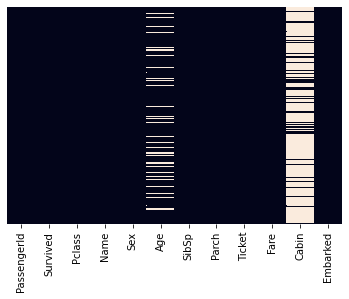

In [30]:
# Making heatmap to display null values as white horizontal bars
sns.heatmap(titanic_train.isnull(), yticklabels=False, cbar=False)

In [31]:
# Filling missing values with most frequent value for Age Column
titanic_train['Age']=titanic_train['Age'].fillna(titanic_train['Age'].mode()[0])


In [32]:
titanic_train['Age'].isnull().sum()

0

In [33]:
# Dropping some columns as may not have significant role in prediction
titanic_train=titanic_train.drop(['PassengerId','Cabin', 'Ticket', 'Name'], axis=1)

In [34]:
# Dropping same columns in test dataset as may not have significant role in prediction
titanic_test=titanic_test.drop(['PassengerId','Cabin', 'Ticket', 'Name'], axis=1)

<AxesSubplot:>

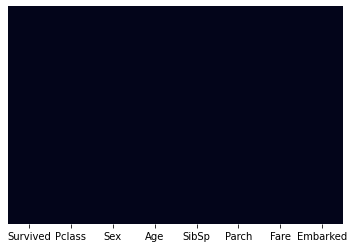

In [35]:
# Double checking if missing values left out
sns.heatmap(titanic_train.isnull(), yticklabels=False, cbar=False)

In [36]:
# Checking null values for the test data sets
titanic_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [37]:
titanic_train.Survived

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [38]:
# Filling missing value of Age column with most frequent value in the test dataset
titanic_test['Age']=titanic_test['Age'].fillna(titanic_test['Age'].mode()[0])


In [39]:
# Filling missing value for the Fare column
titanic_test['Fare']=titanic_test['Fare'].fillna(titanic_test['Fare'].mode()[0])

In [40]:
titanic_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [41]:
# Concatenating training and testing dataset rowise inorder to make sure similar feature engineering applied for both data sets
merge_titanic = pd.concat([titanic_train, titanic_test], axis=0)

In [42]:
# Checking shape after merging datasets
merge_titanic.shape, titanic_train.shape, titanic_test.shape

((1309, 8), (891, 8), (418, 7))

In [43]:
# Preparing for coverting categorical columns into numericals
category = merge_titanic.select_dtypes(object).columns
category

Index(['Sex', 'Embarked'], dtype='object')

In [44]:
merge_titanic[merge_titanic.Fare==0].count()

Survived    15
Pclass      17
Sex         17
Age         17
SibSp       17
Parch       17
Fare        17
Embarked    17
dtype: int64

In [46]:
merge_titanic.select_dtypes('float').columns

Index(['Survived', 'Age', 'Fare'], dtype='object')

In [47]:
merge_titanic.Survived

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
413    NaN
414    NaN
415    NaN
416    NaN
417    NaN
Name: Survived, Length: 1309, dtype: float64

In [48]:
# Applying get_dummies for the merged datasets to obtain similar 
merge_titanic.Age = pd.cut(merge_titanic.Age, include_lowest=True, bins=[0,10,30,50,70,90], 
                           labels=['1','2','3','4','5'])

In [49]:
merge_titanic.Age

0      2
1      3
2      2
3      3
4      3
      ..
413    2
414    3
415    3
416    2
417    2
Name: Age, Length: 1309, dtype: category
Categories (5, object): ['1' < '2' < '3' < '4' < '5']

In [53]:
merge_titanic.Parch.value_counts()

0    1002
1     170
2     113
3       8
4       6
5       6
6       2
9       2
Name: Parch, dtype: int64

In [54]:
# converting Parch columns to category using pd.cut
merge_titanic.Parch = pd.cut(merge_titanic.Parch, bins=[0,1,2,3,4,5,6,9], include_lowest=True,
                             labels=['1','2','3','4','5','6','7'])

In [55]:
merge_titanic.Parch.value_counts()

1    1172
2     113
3       8
4       6
5       6
6       2
7       2
Name: Parch, dtype: int64

In [56]:
# Converting Pclass into categorical column
merge_titanic.Pclass = pd.cut(merge_titanic.Pclass, bins=[0,1,2,3], include_lowest=True, labels=['1','2','3'])

In [156]:
merge_titanic.Fare.unique

<bound method Series.unique of 0        7.2500
1       71.2833
2        7.9250
3       53.1000
4        8.0500
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 1309, dtype: float64>

In [57]:
merge_titanic.select_dtypes('int64').columns

Index(['SibSp'], dtype='object')

In [58]:
# Listing out all the categorical columns
category = ['Sex', 'Embarked', 'Pclass','Age', 'Parch']

In [59]:
# Applied get_dummies to covert all teh categorical column into numerical at once
df_titanic = pd.get_dummies(merge_titanic, columns=category, drop_first=True)

In [60]:
# Checking for null values
df_titanic .isnull().sum()

Survived      418
SibSp           0
Fare            0
Sex_male        0
Embarked_Q      0
Embarked_S      0
Pclass_2        0
Pclass_3        0
Age_2           0
Age_3           0
Age_4           0
Age_5           0
Parch_2         0
Parch_3         0
Parch_4         0
Parch_5         0
Parch_6         0
Parch_7         0
dtype: int64

In [61]:
# Shape of the titanic
df_titanic.shape

(1309, 18)

In [62]:
# Spliting data into train and test datasets
train = df_titanic.iloc[:891,:]
train.shape

(891, 18)

In [63]:
#!pip install imbalanced-learn

In [227]:
#!pip install pandas-profiling

In [230]:
# This code will check 5-point summary, data type, null and skewedness of the data at once
from pandas_profiling import ProfileReport as pfr
profile = pfr(X, title='Pandas Profiling Report for Titanic')

In [231]:
profile

Summarize dataset:   0%|          | 0/30 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Making X and y  value from trai datasets 
X = train.drop('Survived', axis=1)
y = train['Survived']

In [ ]:
# Making test datasets separte from merge dataset
test = df_titanic.iloc[891:,:]
test = test.drop('Survived', axis=1)
test.shape, train.shape

<AxesSubplot:xlabel='Survived', ylabel='count'>

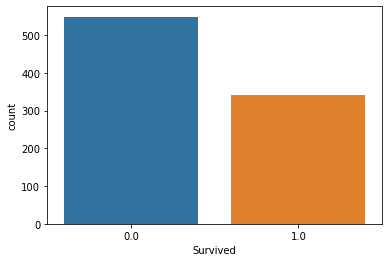

In [417]:
# Checking data distribution for the training survival data set
sns.countplot(train['Survived'])

In [ ]:
# This shows data is imbalaced. Therefore, if trained in dataset the model will be biased to detect non-survival passengares
# more accurately

In [278]:
# Preparing for data balance
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X,y)

In [279]:
print(Counter(y_over))


Counter({0: 549, 1: 549})


In [280]:
# spliting train dataset into X_train, X_test, y_train and y_test by 80 to 20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over,y_over, test_size=0.2, random_state=5)

In [281]:
# Standardising all the features at once
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [282]:
# Checking if there is any non-important features for dimension reductions
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_ss)
X_test_pca = pca.transform(X_test_ss)

In [283]:
print(pca.singular_values_)

[47.35112663 42.34647918 41.86241971 39.47067991 36.22861352 35.21546021
 34.43243619 32.66310744 32.32239721 31.53322196 30.3676935  29.76042699
 29.48799657 28.93920583 28.65390034 27.08000039 26.6621393  24.79916166
 23.77647363 23.37563926 21.84379336 20.44999329 11.00667707  8.03705401
  6.66566796  2.37676456]


In [284]:
# Printing overall cumaulate sum of features
print(np.cumsum(pca.explained_variance_ratio_))

[0.09821838 0.1767721  0.2535402  0.32178685 0.37928258 0.43360747
 0.48554337 0.53227889 0.5780445  0.62160259 0.66200021 0.70079831
 0.73888934 0.77557576 0.81154238 0.84366637 0.87480662 0.90174715
 0.92651151 0.95044792 0.97134994 0.98966965 0.99497659 0.9978062
 0.99975254 1.        ]


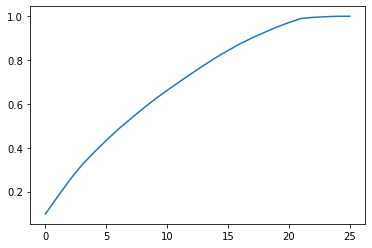

In [285]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [ ]:
# As above result and plot show that all features are important and cannot be removed

In [418]:
# Taking all the colums for building models
pca = PCA(n_components=26)
X_train = pca.fit_transform(X_train_ss)
X_test = pca.transform(X_test_ss)

## Logistic Regressoion Model

In [419]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(max_iter=200)
model_lr.fit(X_train_best_pca, y_train)
y_train_pred = model_lr.predict(X_train_best_pca)
y_test_pred = model_lr.predict(X_test_best_pca)

In [420]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [421]:
print('Accuracy of train dataset is:', accuracy_score(y_train_pred, y_train))
print('Accuracy of test dataset is:', accuracy_score(y_test_pred, y_test))

Accuracy of train dataset is: 0.8234624145785877
Accuracy of test dataset is: 0.8045454545454546


In [422]:
 print(classification_report(y_test_pred, y_test))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79        99
           1       0.83      0.81      0.82       121

    accuracy                           0.80       220
   macro avg       0.80      0.80      0.80       220
weighted avg       0.81      0.80      0.80       220



In [423]:
confusion_matrix(y_test_pred, y_test)

array([[79, 20],
       [23, 98]], dtype=int64)

## Support Vector Machine Model

In [424]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_ss,y_train)
y_train_svm = svm.predict(X_train_ss)
y_test_svm = svm.predict(X_test_ss)

In [425]:
print('Accuracy of train dataset is:', accuracy_score(y_train_svm, y_train))
print('Accuracy of test dataset is:', accuracy_score(y_test_svm, y_test))

Accuracy of train dataset is: 0.8394077448747153
Accuracy of test dataset is: 0.8409090909090909


## XGBoost Model

In [426]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train_ss, y_train)
y_train_xgb = model_xgb.predict(X_train_ss)
y_test_xgb = model_xgb.predict(X_test_ss)

[19:38:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [427]:
print('Accuracy of train dataset is:', accuracy_score(y_train_xgb, y_train))
print('Accuracy of test dataset is:', accuracy_score(y_test_xgb, y_test))

Accuracy of train dataset is: 0.8804100227790432
Accuracy of test dataset is: 0.8681818181818182


In [428]:
confusion_matrix(y_test_xgb, y_test)

array([[ 89,  16],
       [ 13, 102]], dtype=int64)

In [429]:
model_xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=6, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## preparing for XGBoost model improvment using GridSearchCV

In [430]:
params = {'colsample_bytree':[1,0.5],
         'learning_rate' : [0.02,0.05],
          'max_depth' :[5,9,10,11],
          'n_estimators' :[50,80,500]
         }

In [431]:
from sklearn.model_selection import GridSearchCV

model_grid = GridSearchCV(estimator=model_xgb, param_grid=params, cv=5, n_jobs=-1, verbose=2)

In [432]:
model_grid.fit(X_train_ss, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[19:39:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=6,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
         

In [433]:
model_grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=11,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=6, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [328]:
model_xgb_best = XGBClassifier(colsample_bytree=1,learning_rate =0.05, max_depth=5,n_estimators=500)
model_xgb_best.fit(X_train_ss, y_train)
y_model_xgb_best_train_pred = model_xgb_best.predict(X_train_ss)
y_model_xgb_best_test_pred = model_xgb_best.predict(X_test_ss)

[15:57:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [329]:
print('Accuracy of train dataset is:', accuracy_score(y_model_xgb_best_train_pred, y_train))
print('Accuracy of test dataset is:', accuracy_score(y_model_xgb_best_test_pred, y_test))

Accuracy of train dataset is: 0.8712984054669703
Accuracy of test dataset is: 0.8727272727272727


In [268]:
confusion_matrix(y_model_xgb_best_test_pred,y_test)

array([[89, 21],
       [13, 97]], dtype=int64)

## KNeighborsClassifier Model

In [342]:
from sklearn.neighbors import KNeighborsClassifier
error_rate=[]
for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    model_knn = knn.fit(X_train_ss, y_train)
    y_train_model_knn_i = model_knn.predict(X_train_ss)
    y_test_model_knn_i = model_knn.predict(X_test_ss)
    error_rate.append(np.mean(y_test_model_knn_i != y_test))

In [343]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
model_sgd = sgd.fit(X_train_ss, y_train)
y_train_model_sgd = model_sgd.predict(X_train)
y_test_model_sgd = model_sgd.predict(X_test)

In [344]:
print('Accuracy of train dataset is:', accuracy_score(y_train_model_sgd, y_train))
print('Accuracy of test dataset is:', accuracy_score(y_test_model_sgd, y_test))

Accuracy of train dataset is: 0.6788154897494305
Accuracy of test dataset is: 0.6909090909090909


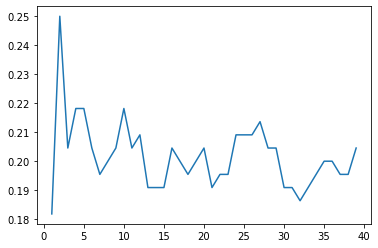

In [345]:
# Finding elbow for the KNN model
plt.plot(range(1,40), error_rate)


In [ ]:
# Above plot shows that n=1 is the best 
knn = KNeighborsClassifier(n_neighbors=1, metric='minkowski')
model_knn = knn.fit(X_train_ss, y_train)
y_train_model_knn = model_knn.predict(X_train_ss)
y_test_model_knn = model_knn.predict(X_test_ss)

In [ ]:
print('Accuracy of train dataset is:', accuracy_score(y_train_model_knn, y_train))
print('Accuracy of test dataset is:', accuracy_score(y_test_model_knn, y_test))

## DecisionTree Model

In [346]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
model_dtc = dtc.fit(X_train_ss, y_train)
y_train_model_tree = model_dtc.predict(X_train_ss)
y_test_model_tree = model_dtc.predict(X_test_ss)

In [347]:
print('Accuracy of train dataset is:', accuracy_score(y_train_model_tree, y_train))
print('Accuracy of test dataset is:', accuracy_score(y_test_model_tree, y_test))

Accuracy of train dataset is: 0.8861047835990888
Accuracy of test dataset is: 0.8636363636363636


In [367]:
params = {'criterion' :["gini", "entropy"],
          'max_depth': [3,5,9,11, None],
          'min_samples_split':[1,2,3],
          'min_samples_leaf':[1,2,3]
}

## Optimizing DecisionTree Model using GridSearcCV

In [368]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=model_dtc, param_grid = params, cv=5, n_jobs=1, verbose=-1)

In [369]:
model_grid = grid.fit(X_train_ss, y_train)

In [370]:
param_best = model_grid.best_params_
param_best

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [413]:
dtc = DecisionTreeClassifier(criterion = 'gini', max_depth= None, min_samples_leaf=1, min_samples_split=2)
model_dtc_best = dtc.fit(X_train_ss, y_train)
y_train_model_tree = model_dtc_best.predict(X_train_ss)
y_test_model_tree = model_dtc_best.predict(X_test_ss)

In [414]:
print('Accuracy of train dataset is:', accuracy_score(y_train_model_tree, y_train))
print('Accuracy of test dataset is:', accuracy_score(y_test_model_tree, y_test))

Accuracy of train dataset is: 0.8861047835990888
Accuracy of test dataset is: 0.8636363636363636


In [377]:
confusion_matrix(y_test_model_tree, y_test)

array([[ 88,  16],
       [ 14, 102]], dtype=int64)

## GaussianNB Model

In [224]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
model_gb = gb.fit(X_train, y_train)
y_train_model_gb_pred = model_gb.predict(X_train)
y_test_model_gb_pred = model_gb.predict(X_test)

In [225]:
print('Accuracy of train dataset is:', accuracy_score(y_train_model_gb_pred, y_train))
print('Accuracy of test dataset is:', accuracy_score(y_test_model_gb_pred, y_test))

Accuracy of train dataset is: 0.7004555808656037
Accuracy of test dataset is: 0.7181818181818181


## From all the models developed here DecisionTree shows better accuracy, precision and recall. Therefore, final prection of the passangers faith is predicted using this model below.

# Preparing for data submission

In [378]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [379]:
gender_submission.shape

(418, 2)

In [380]:
gender_submission1 = gender_submission.drop('Survived', axis=1)

In [381]:
# test data is scaled and predicted using aboved developmed DecisionTree model
test = ss.transform(test)
y_model_dtc_best_test_pred_final = model_dtc_best.predict(test)

In [382]:
gender_submission1['Survived'] = pd.DataFrame(y_model_dtc_best_test_pred_final).astype(int)

In [383]:
gender_submission1

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [385]:
# Saving predicted file in csv
gender_submission1.to_csv('C:/Users/ribis/Documents/Simplilearn_Data Scientist/Kaggle_Competetion/final_submission/gender_submission.csv',
                          index=False)